<a href="https://colab.research.google.com/github/Shivam89539/Comparison-Visualization-of-AWS-and-Azure-cloud.i/blob/main/Comparison_Visualization_of_AWS_and_Azure_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Generate AWS data (your existing code)
aws_data = {
    "Date": pd.date_range(start="2024-01-01", periods=90, freq='D'),
    "Service": np.random.choice(["EC2", "S3", "Lambda", "RDS", "CloudFront"], 90, p=[0.4, 0.3, 0.15, 0.1, 0.05]),
    "Cost": np.round(np.abs(np.random.normal(loc=500, scale=200, size=90)), 2),
    "Region": np.random.choice(["us-east-1", "us-west-2", "eu-central-1"], 90),
    "UsageHours": np.random.randint(1, 720, 90)
}

aws_df = pd.DataFrame(aws_data)

# Add Azure-style columns
aws_df["ResourceGroup"] = "N/A"  # AWS doesn't use Resource Groups
aws_df["Cloud"] = "AWS"

# Rename columns to match Azure format
aws_df = aws_df.rename(columns={
    "Service": "ServiceName",
    "Region": "Location"
})

print("AWS Data Structure:")
print(aws_df.head())

AWS Data Structure:
        Date ServiceName    Cost   Location  UsageHours ResourceGroup Cloud
0 2024-01-01         EC2  163.17  us-east-1         284           N/A   AWS
1 2024-01-02          S3  599.77  us-east-1         359           N/A   AWS
2 2024-01-03      Lambda  409.88  us-east-1         237           N/A   AWS
3 2024-01-04         EC2  703.89  us-west-2         707           N/A   AWS
4 2024-01-05         EC2  727.04  us-west-2         492           N/A   AWS


In [ ]:
# Azure data generation (your existing code)
azure_services = ["Virtual Machines", "Blob Storage", "Azure Functions", "SQL Database", "CDN"]
azure_regions = ["eastus", "westeurope", "southeastasia"]

azure_data = {
    "Date": pd.date_range(start="2024-01-01", periods=90, freq='D'),
    "ServiceName": np.random.choice(azure_services, 90, p=[0.5, 0.25, 0.1, 0.1, 0.05]),
    "Cost": np.round(np.abs(np.random.normal(loc=600, scale=250, size=90)), 2),
    "Location": np.random.choice(azure_regions, 90),
    "UsageHours": np.random.randint(1, 720, 90),
    "ResourceGroup": ["Prod", "Dev"] * 45
}

azure_df = pd.DataFrame(azure_data)
azure_df["Cloud"] = "Azure"

print("\nAzure Data Structure:")
print(azure_df.head())


Azure Data Structure:
        Date       ServiceName    Cost       Location  UsageHours  \
0 2024-01-01  Virtual Machines  691.78  southeastasia         238   
1 2024-01-02  Virtual Machines  919.10  southeastasia         276   
2 2024-01-03  Virtual Machines  405.83     westeurope         593   
3 2024-01-04      Blob Storage  572.86         eastus         666   
4 2024-01-05      SQL Database  343.78     westeurope         673   

  ResourceGroup  Cloud  
0          Prod  Azure  
1           Dev  Azure  
2          Prod  Azure  
3           Dev  Azure  
4          Prod  Azure  


In [ ]:
# Combine both datasets
combined_df = pd.concat([aws_df, azure_df], ignore_index=True)

# Verify combined structure
print("\nCombined Data Columns:", combined_df.columns.tolist())
print("Total AWS Records:", len(combined_df[combined_df["Cloud"] == "AWS"]))
print("Total Azure Records:", len(combined_df[combined_df["Cloud"] == "Azure"]))


Combined Data Columns: ['Date', 'ServiceName', 'Cost', 'Location', 'UsageHours', 'ResourceGroup', 'Cloud']
Total AWS Records: 90
Total Azure Records: 90


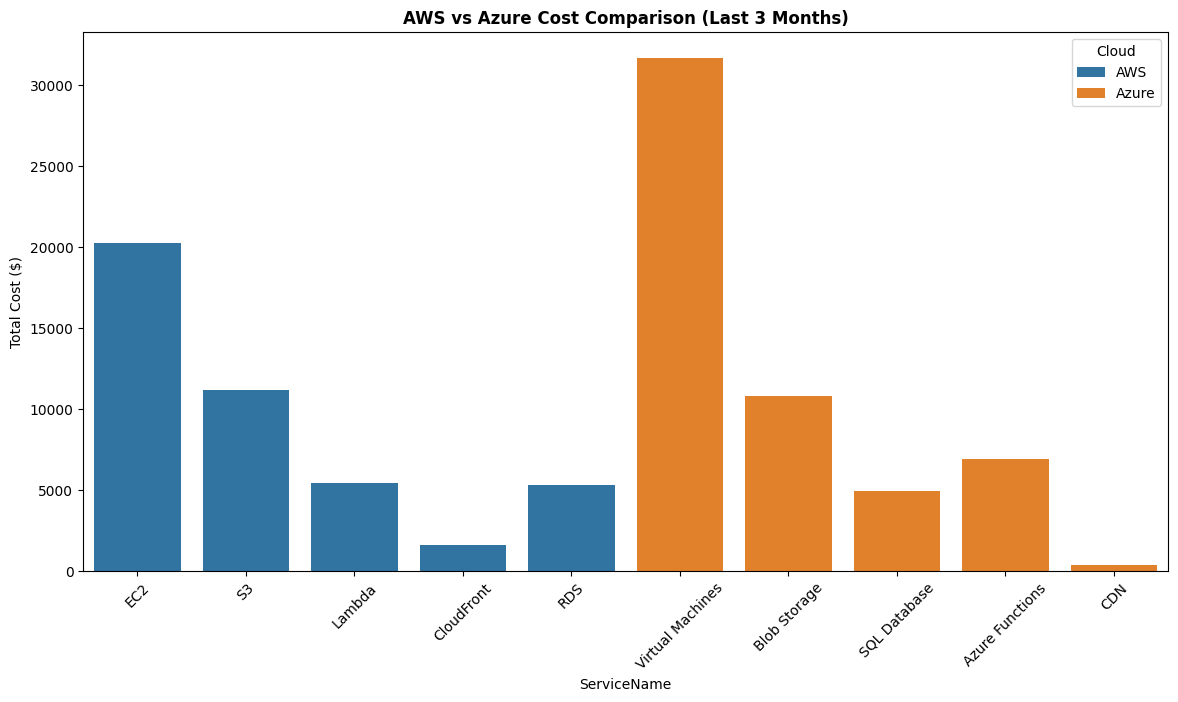

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(
    x="ServiceName",
    y="Cost",
    hue="Cloud",
    data=combined_df,
    estimator=sum,
    errorbar=None
)
plt.title("AWS vs Azure Cost Comparison (Last 3 Months)", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Total Cost ($)")
plt.show()

In [ ]:
# Calculate cost/hour ratio
aws_cost_per_hour = aws_df["Cost"].sum() / aws_df["UsageHours"].sum()
azure_cost_per_hour = azure_df["Cost"].sum() / azure_df["UsageHours"].sum()

print(f"AWS Cost per Hour: ${aws_cost_per_hour:.2f}")
print(f"Azure Cost per Hour: ${azure_cost_per_hour:.2f}")

# Comparison conclusion
if aws_cost_per_hour < azure_cost_per_hour:
    print("\nAWS provides better cost-efficiency for compute resources")
elif aws_cost_per_hour > azure_cost_per_hour:
    print("\nAzure provides better cost-efficiency for compute resources")
else:
    print("\nBoth clouds have similar cost-efficiency")

AWS Cost per Hour: $1.40
Azure Cost per Hour: $1.54

AWS provides better cost-efficiency for compute resources


In [ ]:
more Comparison

FileNotFoundError: [Errno 2] No such file or directory: 'Comparison'

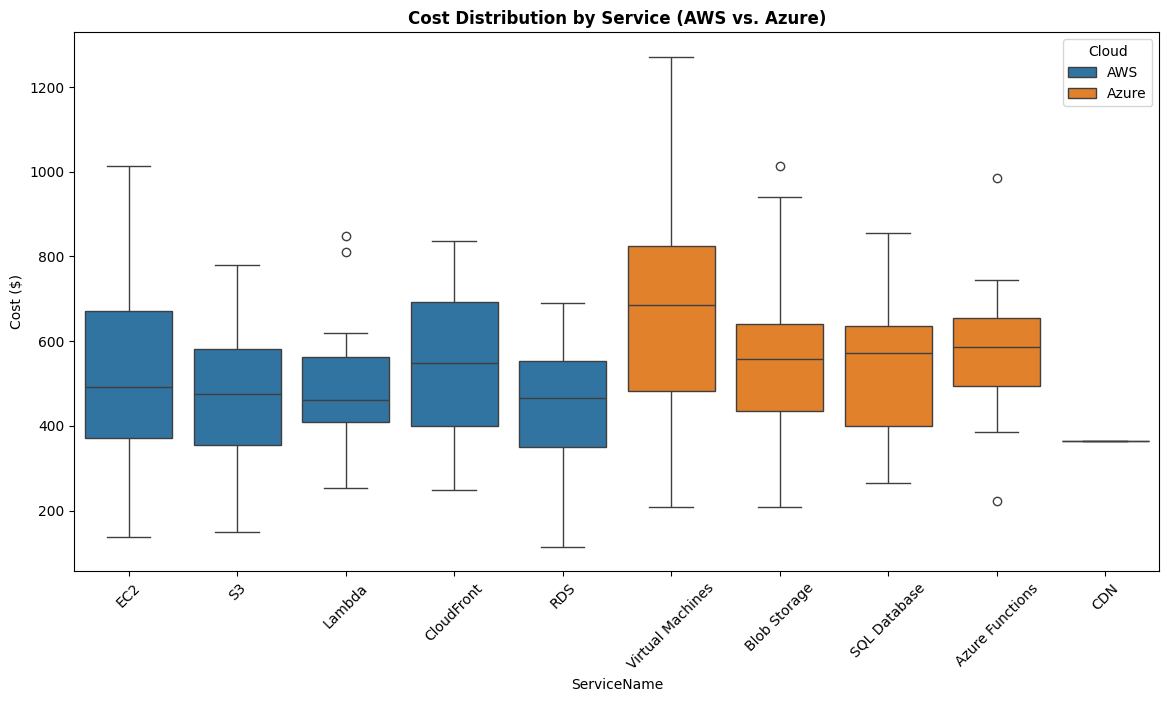

<ipython-input-7-e5e2ddeea044>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Date", y="Cost", hue="Cloud", data=combined_df, estimator=sum, ci=None)


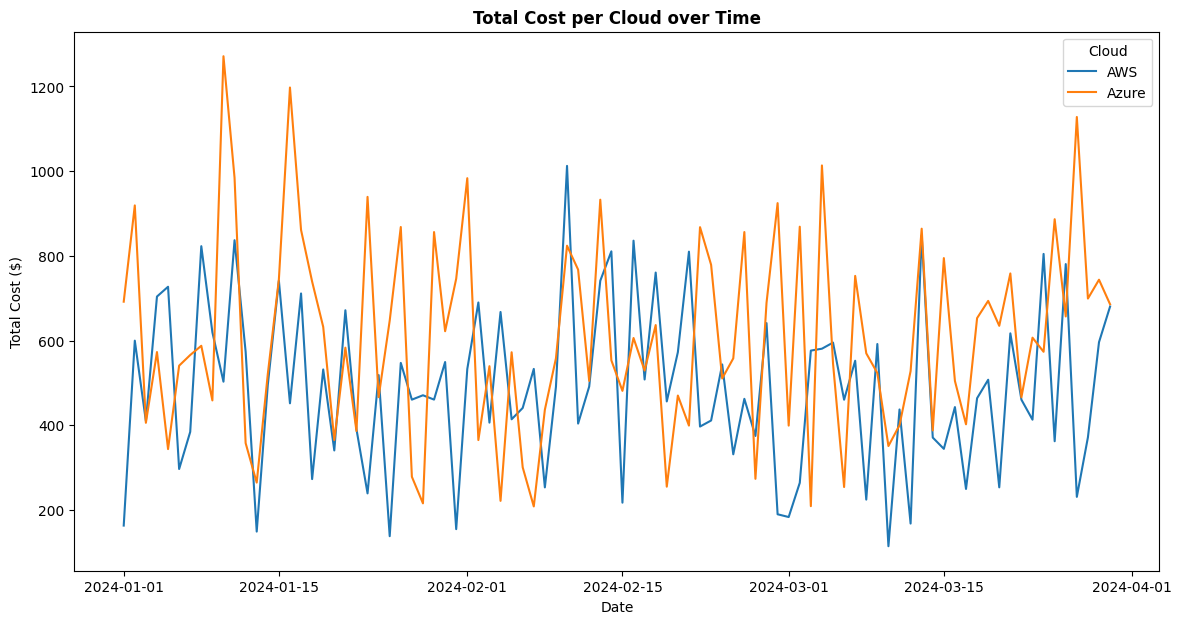

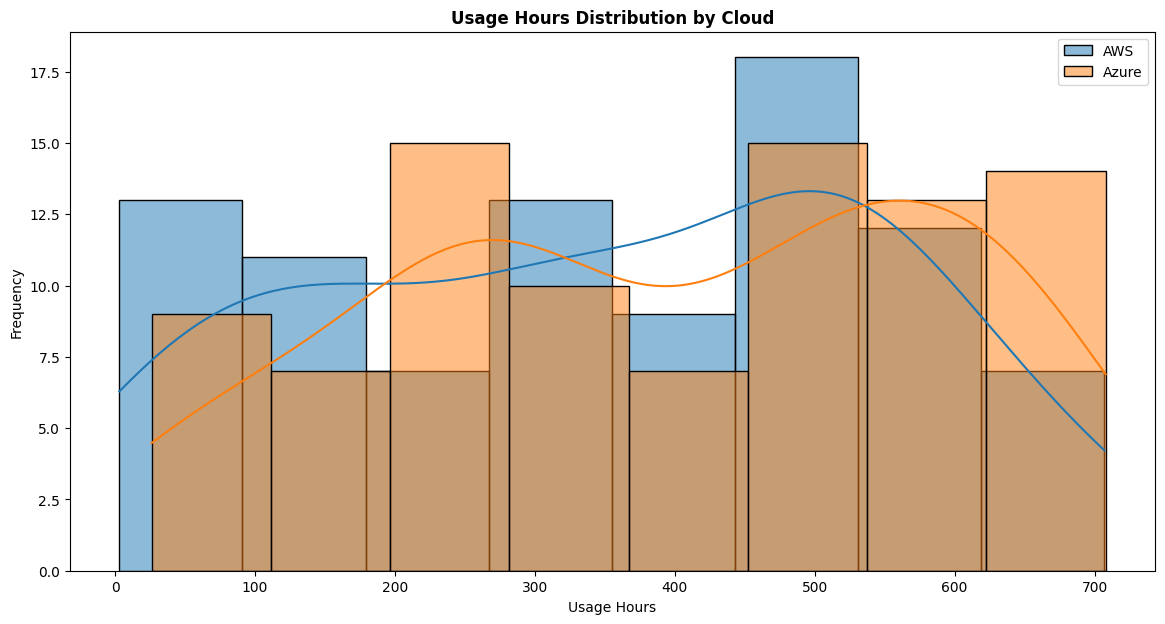

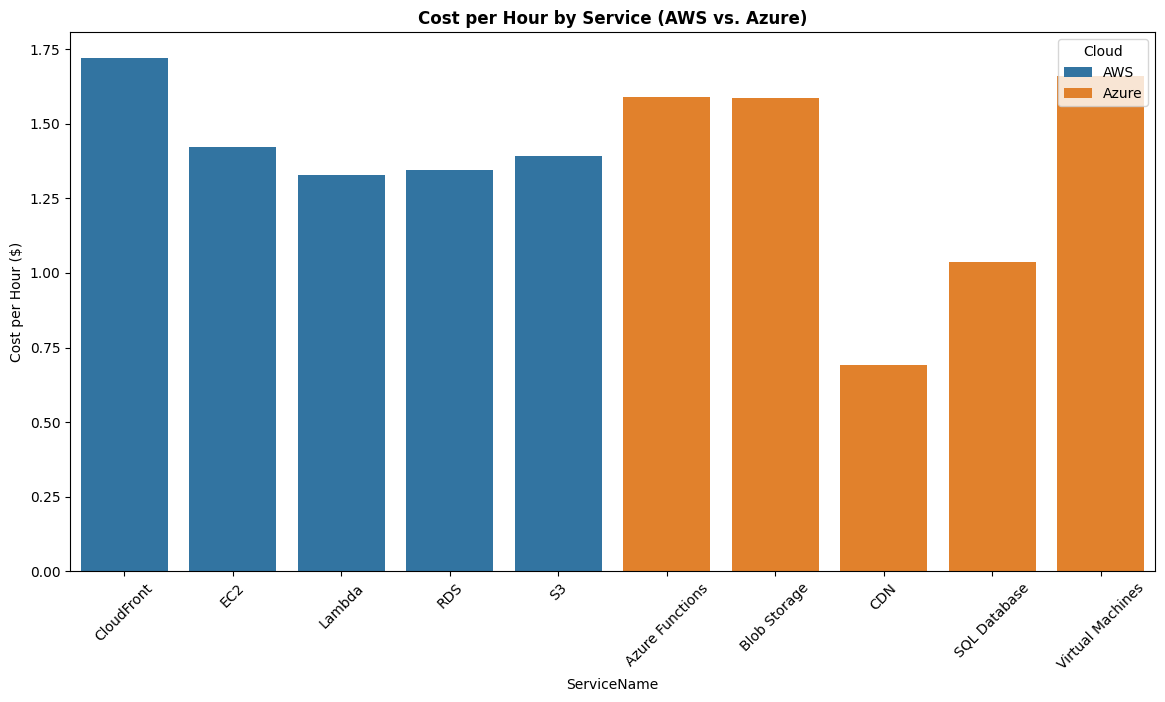

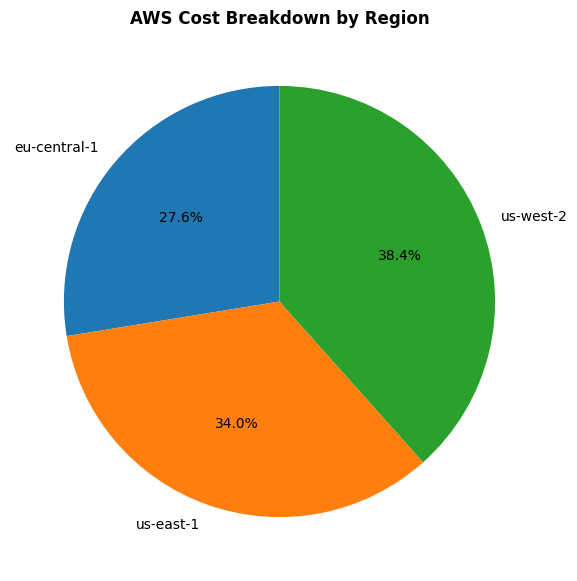

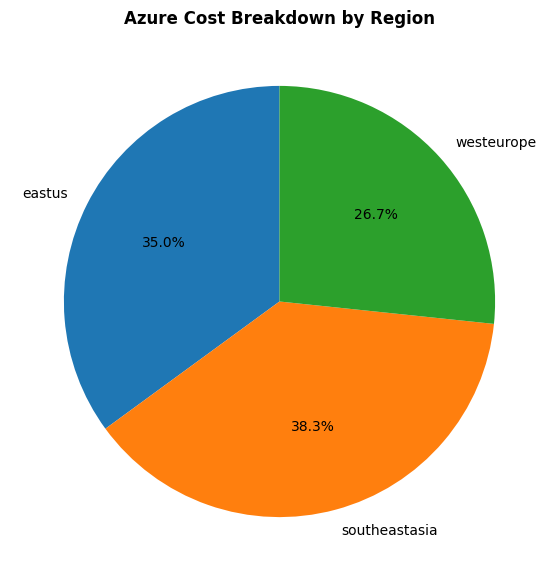

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ... (Your existing code for data generation and combining datasets) ...


# Visualization 1: Cost Distribution by Service (Box Plots)
plt.figure(figsize=(14, 7))
sns.boxplot(x="ServiceName", y="Cost", hue="Cloud", data=combined_df)
plt.title("Cost Distribution by Service (AWS vs. Azure)", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Cost ($)")
plt.show()

# Visualization 2: Total Cost per Cloud over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x="Date", y="Cost", hue="Cloud", data=combined_df, estimator=sum, ci=None)
plt.title("Total Cost per Cloud over Time", fontweight="bold")
plt.ylabel("Total Cost ($)")
plt.show()

# Visualization 3: Usage Hours Distribution by Service (Histograms)
plt.figure(figsize=(14, 7))
for cloud in ["AWS", "Azure"]:
    sns.histplot(combined_df[combined_df["Cloud"] == cloud]["UsageHours"], label=cloud, kde=True)
plt.title("Usage Hours Distribution by Cloud", fontweight="bold")
plt.xlabel("Usage Hours")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualization 4: Cost per Hour by Service
cost_per_hour_df = combined_df.groupby(["Cloud", "ServiceName"])[["Cost", "UsageHours"]].sum().reset_index()
cost_per_hour_df["CostPerHour"] = cost_per_hour_df["Cost"] / cost_per_hour_df["UsageHours"]

plt.figure(figsize=(14, 7))
sns.barplot(x="ServiceName", y="CostPerHour", hue="Cloud", data=cost_per_hour_df)
plt.title("Cost per Hour by Service (AWS vs. Azure)", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Cost per Hour ($)")
plt.show()

# Visualization 5: Cost Breakdown by Region (Pie Charts)
for cloud in ["AWS", "Azure"]:
    cloud_df = combined_df[combined_df["Cloud"] == cloud]
    region_costs = cloud_df.groupby("Location")["Cost"].sum()

    plt.figure(figsize=(7, 7))
    plt.pie(region_costs, labels=region_costs.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"{cloud} Cost Breakdown by Region", fontweight="bold")
    plt.show()